# Importing the Train dataset

In [1]:
import numpy as np
import pandas as pd

telecom_train = pd.read_csv('C:/Users/neela/Desktop/INSAID/INSAID ML foundation project/Churn_train.csv')
telecom_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,...,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,...,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No


In [2]:
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


Converting TotalCharges to float type

In [3]:
try:
    telecom_train['TotalCharges'] = telecom_train['TotalCharges'].astype(float)
except ValueError as ve:
    print(ve)

could not convert string to float: ''


In [4]:
#This indicates that some empty values are stored as empty spaces. 
#Let’s transform the feature into a numerical format while equating these empty string spaces as NaN as follows:

telecom_train['TotalCharges'] = pd.to_numeric(telecom_train['TotalCharges'],errors='coerce')

#Fill the missing values with with the median value

telecom_train['TotalCharges'] = telecom_train['TotalCharges'].fillna(telecom_train['TotalCharges'].median())

In [5]:
telecom_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [6]:
telecom_train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127,2279.404499
std,0.368368,24.555211,30.104993,2265.030370
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.400000,392.775000
50%,0.000000,29.000000,70.375000,1394.800000
75%,0.000000,55.000000,89.850000,3787.500000
max,1.000000,72.000000,118.650000,8684.800000


In [7]:
telecom_train.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Study on Churn with respect to Categorical features

# Churn Distribution

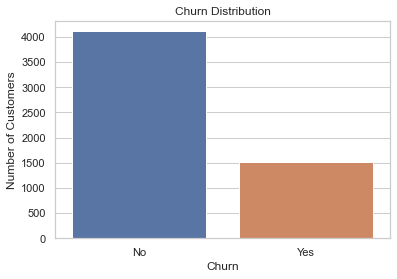

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
ax = sns.countplot(x= telecom_train['Churn'], data = telecom_train)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Churn')
ax.set_title('Churn Distribution')
plt.show()

# Gender Distribution

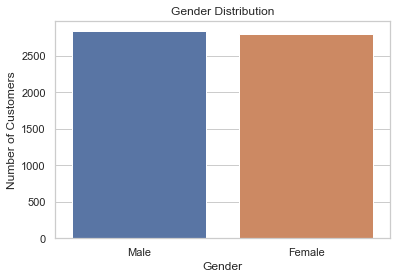

In [9]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= telecom_train['gender'], data = telecom_train)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')
plt.show()

Churn across Gender

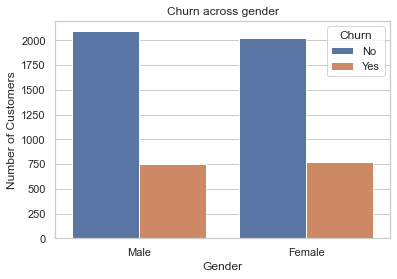

In [10]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= telecom_train['gender'], hue=telecom_train['Churn'], data = telecom_train)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Gender')
ax.set_title('Churn across gender')
plt.show()

# Senior Citizen Distribution

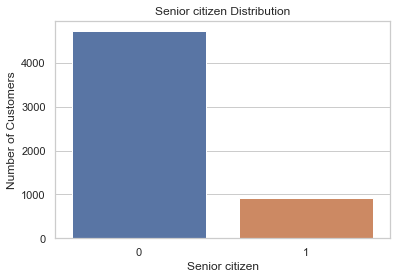

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x= telecom_train['SeniorCitizen'], data = telecom_train)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Senior citizen')
ax.set_title('Senior citizen Distribution')
plt.show()

Churn across Age

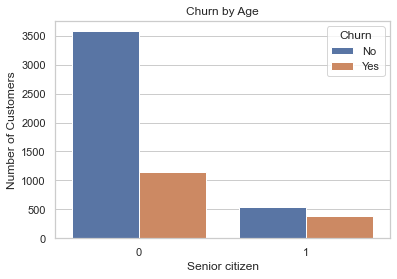

In [12]:
sns.set_theme(style='whitegrid')
ax = sns.countplot(x='SeniorCitizen', hue='Churn',data = telecom_train)
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Senior citizen')
ax.set_title('Churn by Age')
plt.show()

Violin Plot: Monthly charges by Age

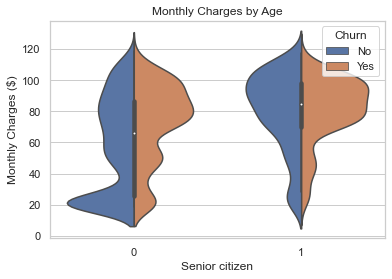

In [13]:
sns.set_theme(style='whitegrid')
ax = sns.violinplot(x='SeniorCitizen', y='MonthlyCharges', hue='Churn', data = telecom_train, split=True)
ax.set_ylabel('Monthly Charges ($)')
ax.set_xlabel('Senior citizen')
ax.set_title('Monthly Charges by Age')
plt.show()

# Partners & Dependents

Churn across Partners

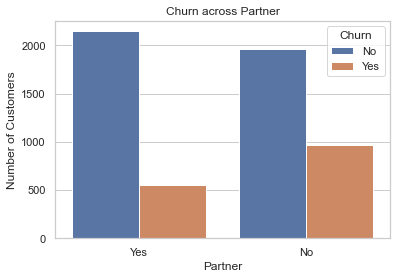

In [14]:
sns.set_theme(style='whitegrid')
ax= sns.countplot(x='Partner', hue='Churn', data=telecom_train)
ax.set_xlabel('Partner')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Partner')
plt.show()

Violin Plot: Monthly charges by Partner

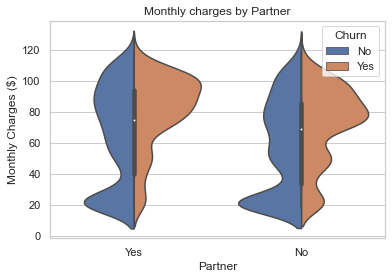

In [15]:
sns.set_theme(style='whitegrid')
ax= sns.violinplot(x='Partner',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Partner')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Partner')
plt.show()

Churn across Dependents

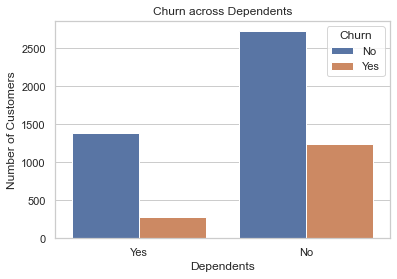

In [16]:
sns.set_theme(style="whitegrid")
ax= sns.countplot(x='Dependents', hue='Churn', data=telecom_train)
ax.set_xlabel('Dependents')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Dependents')
plt.show()

Violin Plot: Monthly charges by Dependents

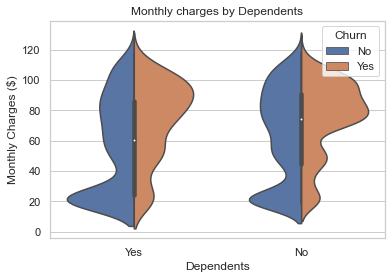

In [17]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='Dependents',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Dependents')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Dependents')
plt.show()

# Phone Service and Multiple Lines

Churn across Phone Service

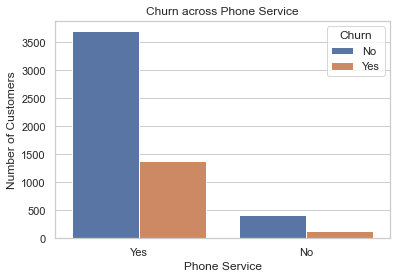

In [18]:
sns.set_theme(style="whitegrid")
ax= sns.countplot(x='PhoneService', hue='Churn', data=telecom_train)
ax.set_xlabel('Phone Service')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Phone Service')
plt.show()

Violin Plot: Monthly charges by Phone Services

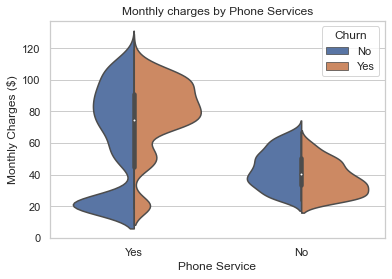

In [19]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='PhoneService',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Phone Service')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Phone Services')
plt.show()

Churn across Multiple Lines

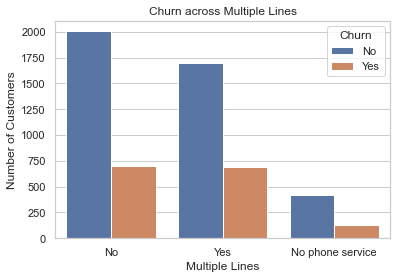

In [20]:
sns.set_theme(style="whitegrid")
ax= sns.countplot(x='MultipleLines', hue='Churn', data=telecom_train)
ax.set_xlabel('Multiple Lines')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Multiple Lines')
plt.show()

Violin Plot: Monthly charges by Multiple Lines

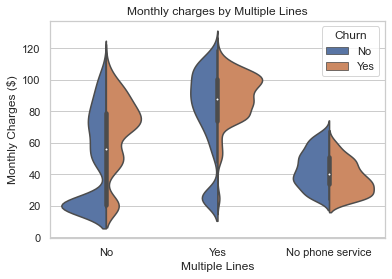

In [21]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='MultipleLines',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Multiple Lines')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Multiple Lines')
plt.show()

# Internet Services

Churn across Internet Service

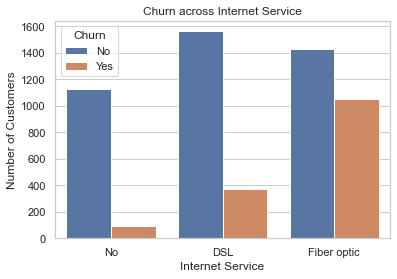

In [22]:
sns.set_theme(style="whitegrid")
ax= sns.countplot(x='InternetService', hue='Churn', data=telecom_train)
ax.set_xlabel('Internet Service')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Internet Service')
plt.show()

Violin Plot: Monthly charges by Internet Service

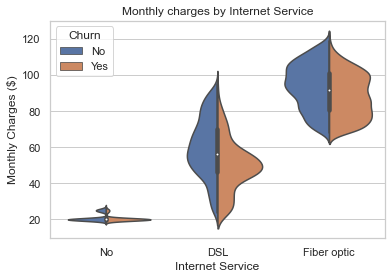

In [23]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='InternetService',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Internet Service')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Internet Service')
plt.show()

# Add-On Services

Customers with Online Security

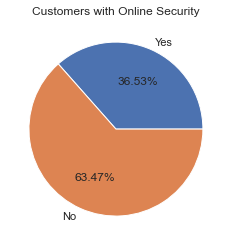

In [24]:
online_security_yes = telecom_train.loc[telecom_train['OnlineSecurity'] == 'Yes'].count()[0]
online_security_no = telecom_train.loc[telecom_train['OnlineSecurity'] == 'No'].count()[0]
labels = ['Yes','No']
plt.pie([online_security_yes,online_security_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Online Security')
plt.show()

Violin Plot: Monthly charges by Online Security

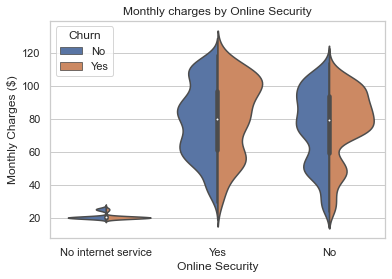

In [25]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='OnlineSecurity',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Online Security')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Online Security')
plt.show()

Customers with Online Backup

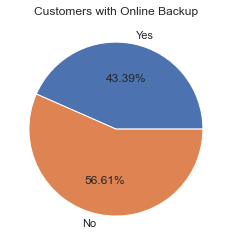

In [26]:
online_backup_yes = telecom_train.loc[telecom_train['OnlineBackup'] == 'Yes'].count()[0]
online_backup_no = telecom_train.loc[telecom_train['OnlineBackup'] == 'No'].count()[0]
labels = ['Yes', 'No']
plt.pie([online_backup_yes,online_backup_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Online Backup')
plt.show()

Violin Plot: Monthly charges by Online Backup

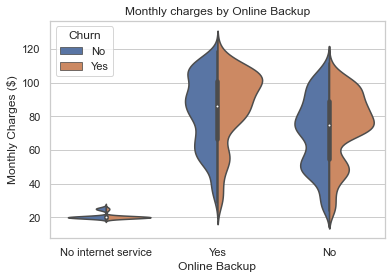

In [27]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='OnlineBackup',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Online Backup')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Online Backup')
plt.show()

Customers with Device Protection

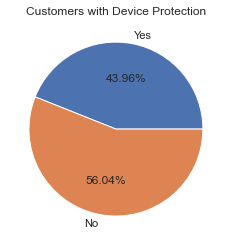

In [28]:
online_backup_yes = telecom_train.loc[telecom_train['DeviceProtection'] == 'Yes'].count()[0]
online_backup_no = telecom_train.loc[telecom_train['DeviceProtection'] == 'No'].count()[0]
labels = ['Yes', 'No']
plt.pie([online_backup_yes,online_backup_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Device Protection')
plt.show()

Violin Plot: Monthly charges by Device Protection

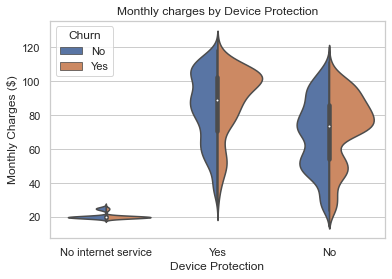

In [29]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='DeviceProtection',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Device Protection')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Device Protection')
plt.show()

Customers with Tech Support

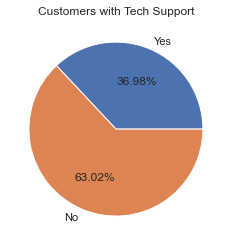

In [30]:
online_backup_yes = telecom_train.loc[telecom_train['TechSupport'] == 'Yes'].count()[0]
online_backup_no = telecom_train.loc[telecom_train['TechSupport'] == 'No'].count()[0]
labels = ['Yes', 'No']
plt.pie([online_backup_yes,online_backup_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Tech Support')
plt.show()

Violin Plot: Monthly charges by Tech Support

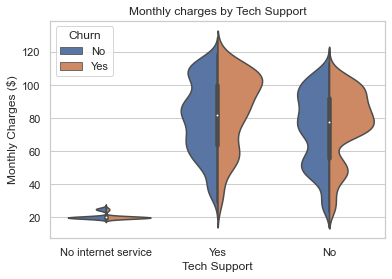

In [31]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='TechSupport',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Tech Support')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Tech Support')
plt.show()

Customers with Streaming TV

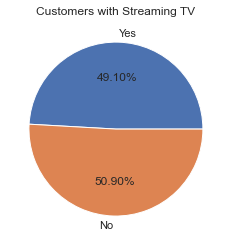

In [32]:
online_backup_yes = telecom_train.loc[telecom_train['StreamingTV'] == 'Yes'].count()[0]
online_backup_no = telecom_train.loc[telecom_train['StreamingTV'] == 'No'].count()[0]
labels = ['Yes', 'No']
plt.pie([online_backup_yes,online_backup_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Streaming TV')
plt.show()

Violin Plot: Monthly charges by Streaming TV

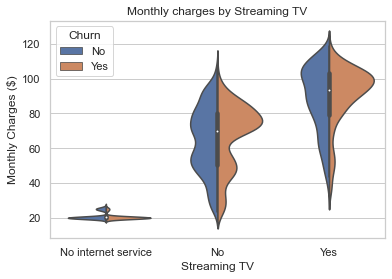

In [33]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='StreamingTV',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Streaming TV')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Streaming TV')
plt.show()

Customers with Streaming Movies

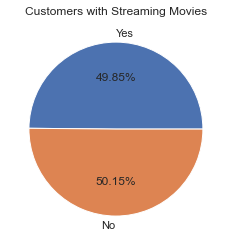

In [34]:
online_backup_yes = telecom_train.loc[telecom_train['StreamingMovies'] == 'Yes'].count()[0]
online_backup_no = telecom_train.loc[telecom_train['StreamingMovies'] == 'No'].count()[0]
labels = ['Yes', 'No']
plt.pie([online_backup_yes,online_backup_no], labels=labels, autopct='%.2f%%')
plt.title('Customers with Streaming Movies')
plt.show()

Violin Plot: Monthly charges by Streaming Movies

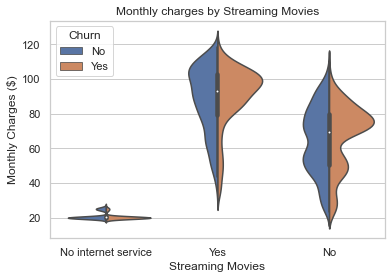

In [35]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='StreamingMovies',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Streaming Movies')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Streaming Movies')
plt.show()

# Contracts

Churn across Contract

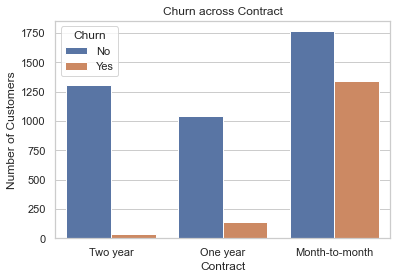

In [36]:
sns.set_theme(style="whitegrid")
ax= sns.countplot(x='Contract', hue='Churn', data=telecom_train)
ax.set_xlabel('Contract')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Contract')
plt.show()

Violin Plot: Monthly Charges by Contract

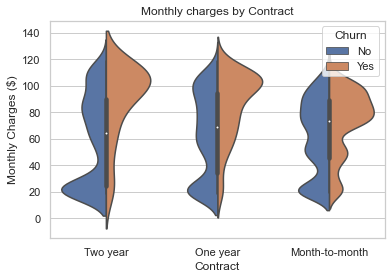

In [37]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='Contract',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Contract')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Contract')
plt.show()

# Paperless Billing & Payments

Churn across Paperless Billing

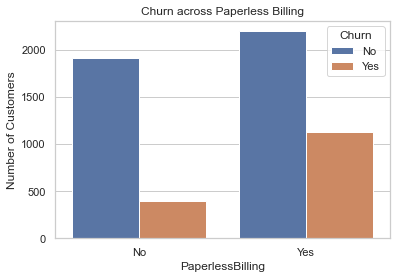

In [38]:
sns.set_theme(style='whitegrid')
ax = sns.countplot(x='PaperlessBilling', hue='Churn', data=telecom_train)
ax.set_xlabel('PaperlessBilling')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Paperless Billing')
plt.show()

Violin Plot: Monthly Charges by Paperless Billing

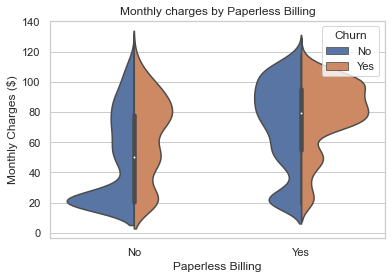

In [39]:
sns.set_theme(style="whitegrid")
ax= sns.violinplot(x='PaperlessBilling',y='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Paperless Billing')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Paperless Billing')
plt.show()

Churn across Payment Method

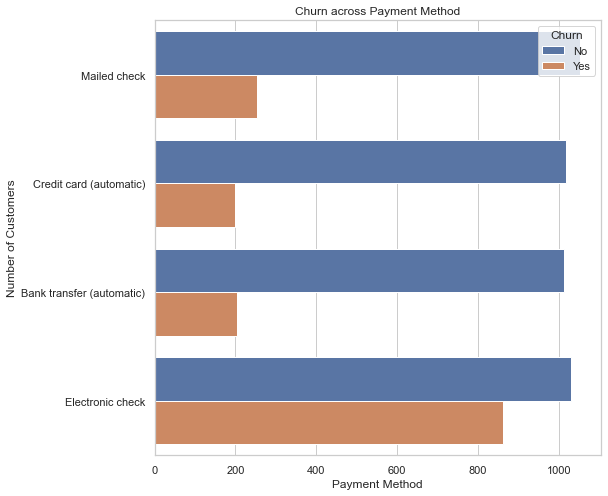

In [40]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,8))
ax = sns.countplot(y='PaymentMethod', hue='Churn', data=telecom_train)
ax.set_xlabel('Payment Method')
ax.set_ylabel('Number of Customers')
ax.set_title('Churn across Payment Method')
plt.show()

Violin Plot: Monthly Charges by Payment Methods

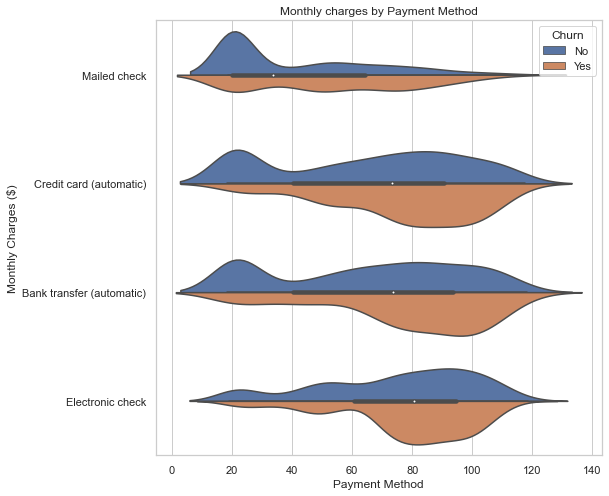

In [41]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,8))
ax= sns.violinplot(y='PaymentMethod',x='MonthlyCharges', hue='Churn', data=telecom_train, split=True)
ax.set_xlabel('Payment Method')
ax.set_ylabel('Monthly Charges ($)')
ax.set_title('Monthly charges by Payment Method')
plt.show()

# Data Preprocessing of Train dataset

Drop customerID column

In [42]:
# saving the below columns not required, to temporary variables
cust_id = telecom_train['customerID']

# Dropping above column from train dataset
telecom_train = telecom_train.drop(['customerID'], axis=1)

telecom_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No
3,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45,6300.85,No
4,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40,2044.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,1,No,No,9,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.50,918.60,Yes
5630,Male,0,No,Yes,60,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.95,1189.90,No
5631,Male,0,No,No,28,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.70,2979.50,Yes
5632,Male,0,No,No,2,Yes,Yes,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,54.40,114.10,Yes


Label Encoding for Binary variables

In [43]:
def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes':1 ,'No':0})
    return

label_encoding(['Partner', 'Dependents','PhoneService', 'PaperlessBilling','Churn'],telecom_train)    
telecom_train['gender'] = telecom_train['gender'].map({'Female':1 ,'Male':0}) 
telecom_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,12,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,19.70,258.35,0
1,1,0,0,0,42,1,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,0,Credit card (automatic),73.90,3160.55,1
2,0,0,1,0,71,1,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,0,Bank transfer (automatic),65.15,4681.75,0
3,0,0,1,1,71,1,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,0,Electronic check,85.45,6300.85,0
4,0,0,0,0,30,1,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,0,Electronic check,70.40,2044.75,0


One Hot Encoding for columns with more than 2 values 

In [44]:
features_ohe = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
telecom_train = pd.get_dummies(telecom_train, columns=features_ohe)
telecom_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,12,1,0,19.70,258.35,0,...,0,1,0,0,0,1,0,0,0,1
1,1,0,0,0,42,1,0,73.90,3160.55,1,...,0,0,1,0,1,0,0,1,0,0
2,0,0,1,0,71,1,0,65.15,4681.75,0,...,1,0,0,0,0,1,1,0,0,0
3,0,0,1,1,71,1,0,85.45,6300.85,0,...,0,0,1,0,1,0,0,0,1,0
4,0,0,0,0,30,1,0,70.40,2044.75,0,...,1,0,0,0,1,0,0,0,1,0


# Feature Rescaling : Standard Scaler (Train data)

In [45]:
from sklearn.preprocessing import StandardScaler

features_ss = ['tenure','MonthlyCharges','TotalCharges']

df_features_ss = pd.DataFrame(telecom_train,columns=features_ss)
df_remaining_features = telecom_train.drop(columns=features_ss)

ss = StandardScaler()
rescaled_features = ss.fit_transform(df_features_ss)

df_rescaled_features = pd.DataFrame(rescaled_features, columns = features_ss, index=df_remaining_features.index)

telecom_train = pd.concat([df_remaining_features, df_rescaled_features],axis=1)

# Importing the Test dataset

In [46]:
telecom_test = pd.read_csv('C:/Users/neela/Desktop/INSAID/INSAID ML foundation project/Churn_test.csv')
telecom_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05


In [47]:
telecom_test.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [48]:
telecom_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


Converting TotalCharges to float type

In [49]:
try:
    telecom_test['TotalCharges'] = telecom_test['TotalCharges'].astype(float)
except ValueError as ve:
    print(ve)

could not convert string to float: ''


In [50]:
telecom_test['TotalCharges'] = pd.to_numeric(telecom_test['TotalCharges'], errors='coerce')
telecom_test['TotalCharges'] = telecom_test['TotalCharges'].fillna(telecom_test['TotalCharges'].median())

Drop customerID column

In [51]:
# saving the below columns not required, to temporary variables
cust_id_test = telecom_test['customerID']

# Dropping above columns from train dataset
telecom_test = telecom_test.drop(['customerID'], axis=1)
telecom_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85,3320.75
1,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40,6471.85
2,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00,524.35
3,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60,249.95
4,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90,660.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,Male,1,No,No,25,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,No,Mailed check,105.95,2655.25
1405,Female,0,No,No,15,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.60,331.60
1406,Male,0,No,No,71,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Bank transfer (automatic),53.95,3888.65
1407,Male,1,Yes,Yes,65,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,85.75,5688.45


Label Encoding for Binary variables

In [52]:
def label_encoding(features,df):
    for i in features:
        df[i] = df[i].map({'Yes':1 ,'No':0})
    return

label_encoding(['Partner', 'Dependents','PhoneService', 'PaperlessBilling'],telecom_test)    
telecom_test['gender'] = telecom_test['gender'].map({'Female':1 ,'Male':0}) 
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,0,41,1,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,1,Bank transfer (automatic),79.85,3320.75
1,1,1,0,0,66,1,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,1,Bank transfer (automatic),102.40,6471.85
2,1,0,0,0,12,1,No,DSL,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),45.00,524.35
3,1,0,0,0,5,1,Yes,DSL,No,No,No,No,No,No,Month-to-month,1,Mailed check,50.60,249.95
4,1,0,1,1,10,1,No,DSL,No,Yes,Yes,No,No,Yes,One year,1,Mailed check,65.90,660.05


One Hot Encoding for columns with more than 2 values 

In [53]:
features_ohe = ['MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod']
telecom_test = pd.get_dummies(telecom_test, columns=features_ohe)
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,41,1,1,79.85,3320.75,1,...,0,0,1,0,1,0,1,0,0,0
1,1,1,0,0,66,1,1,102.40,6471.85,0,...,0,0,1,0,0,1,1,0,0,0
2,1,0,0,0,12,1,1,45.00,524.35,1,...,1,0,0,1,0,0,1,0,0,0
3,1,0,0,0,5,1,1,50.60,249.95,0,...,1,0,0,1,0,0,0,0,0,1
4,1,0,1,1,10,1,1,65.90,660.05,1,...,0,0,1,0,1,0,0,0,0,1


# Feature Rescaling : Standard Scaling (Test data)

In [54]:
from sklearn.preprocessing import StandardScaler

features_ss = ['tenure','MonthlyCharges','TotalCharges']

df_features_ss = pd.DataFrame(telecom_test,columns=features_ss)
df_remaining_features = telecom_test.drop(columns=features_ss)

ss = StandardScaler()
rescaled_features = ss.fit_transform(df_features_ss)

df_rescaled_features = pd.DataFrame(rescaled_features, columns = features_ss, index=df_remaining_features.index)

telecom_test = pd.concat([df_remaining_features, df_rescaled_features],axis=1)
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,1,0,0,0,1,1,1,0,0,1,...,0,1,0,1,0,0,0,0.335987,0.504761,0.453963
1,1,1,0,0,1,1,0,0,1,0,...,0,0,1,1,0,0,0,1.353363,1.255673,1.844444
2,1,0,0,0,1,1,1,0,0,1,...,1,0,0,1,0,0,0,-0.844170,-0.655741,-0.780000
3,1,0,0,0,1,1,0,0,1,1,...,1,0,0,0,0,0,1,-1.129035,-0.469262,-0.901084
4,1,0,1,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,-0.925560,0.040227,-0.720120


In [55]:
telecom_train.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0,0,1,1,1,0,0,1,0,0,...,0,0,1,0,0,0,1,-0.825884,-1.497530,-0.892365
1,1,0,0,0,1,0,1,1,0,0,...,0,1,0,0,1,0,0,0.395961,0.302996,0.389056
2,0,0,1,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,1.577078,0.012320,1.060718
3,0,0,1,1,1,0,0,0,0,1,...,0,1,0,0,0,1,0,1.577078,0.686687,1.775606
4,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,-0.092777,0.186726,-0.103608


In [56]:
telecom_train.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,...,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5634.000000,5.634000e+03,5.634000e+03,5.634000e+03
mean,0.496273,0.161874,0.479588,0.295705,0.902911,0.589457,0.269968,0.479233,0.097089,0.423678,...,0.550941,0.210508,0.238552,0.216365,0.216010,0.335996,0.231629,-2.171576e-17,-4.077592e-16,-3.123364e-17
std,0.500030,0.368368,0.499628,0.456399,0.296105,0.491976,0.443982,0.499613,0.296105,0.494184,...,0.497442,0.407705,0.426236,0.411802,0.411558,0.472379,0.421911,1.000089e+00,1.000089e+00,1.000089e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.314622e+00,-1.545699e+00,-9.981346e-01
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.480685e-01,-9.759755e-01,-8.330118e-01
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.335051e-01,1.858951e-01,-3.905833e-01
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.254272e-01,8.328552e-01,6.658760e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.617806e+00,1.789592e+00,2.828202e+00


In [57]:
telecom_test.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
count,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,...,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1409.000000,1.409000e+03,1.409000e+03,1.409000e+03
mean,0.491128,0.163236,0.496806,0.315117,0.904187,0.603265,0.489709,0.095813,0.414478,0.345635,...,0.547197,0.203691,0.249113,0.230660,0.216466,0.334989,0.217885,-7.651005e-17,2.135347e-16,1.914721e-17
std,0.500099,0.369712,0.500167,0.464727,0.294439,0.489394,0.500072,0.294439,0.492807,0.475744,...,0.497944,0.402884,0.432653,0.421405,0.411981,0.472154,0.412955,1.000355e+00,1.000355e+00,1.000355e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.332510e+00,-1.531528e+00,-1.002907e+00
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.662548e-01,-9.271351e-01,-8.231121e-01
50%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.523537e-01,1.817515e-01,-3.876243e-01
75%,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,9.464127e-01,8.377595e-01,6.583803e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.597534e+00,1.800127e+00,2.815499e+00


# Splitting the X and y variables

In [58]:
X_train = telecom_train.drop(['Churn'],axis=1)
y_train = telecom_train['Churn']
X_test = telecom_test


# Setting up Classification model

a) Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
result1 = logreg.fit(X_train, y_train)
y_pred_train1 = logreg.predict(X_train)

print (metrics.accuracy_score(y_train, y_pred_train1))

0.8040468583599574


C:\Users\neela\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


b) KNN Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
result2 = knn.fit(X_train,y_train)
y_pred_train2 = knn.predict(X_train)

print (metrics.accuracy_score(y_train, y_pred_train2))

0.8656372026979056


Choosing the best fit model

In [61]:
y_pred_test = knn.predict(X_test)

In [62]:
telecom_test['Churn'] = y_pred_test
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,1,1,1,0,0,1,...,1,0,1,0,0,0,0.335987,0.504761,0.453963,0
1,1,1,0,0,1,1,0,0,1,0,...,0,1,1,0,0,0,1.353363,1.255673,1.844444,0
2,1,0,0,0,1,1,1,0,0,1,...,0,0,1,0,0,0,-0.844170,-0.655741,-0.780000,1
3,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,1,-1.129035,-0.469262,-0.901084,1
4,1,0,1,1,1,1,1,0,0,1,...,1,0,0,0,0,1,-0.925560,0.040227,-0.720120,0


In [63]:
telecom_test['customerID'] = cust_id_test
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn,customerID
0,1,0,0,0,1,1,1,0,0,1,...,0,1,0,0,0,0.335987,0.504761,0.453963,0,8879-ZKJOF
1,1,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1.353363,1.255673,1.844444,0,0201-MIBOL
2,1,0,0,0,1,1,1,0,0,1,...,0,1,0,0,0,-0.844170,-0.655741,-0.780000,1,1600-DILPE
3,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,-1.129035,-0.469262,-0.901084,1,8601-QACRS
4,1,0,1,1,1,1,1,0,0,1,...,0,0,0,0,1,-0.925560,0.040227,-0.720120,0,7919-ZODZZ


In [64]:
def reverse_encoding(feature,df):
    for i in feature:
        df[i] = df[i].map({1:'Yes', 0:'No'})
    return

reverse_encoding(['Churn'],telecom_test)
telecom_test.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges,Churn,customerID
0,1,0,0,0,1,1,1,0,0,1,...,0,1,0,0,0,0.335987,0.504761,0.453963,No,8879-ZKJOF
1,1,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1.353363,1.255673,1.844444,No,0201-MIBOL
2,1,0,0,0,1,1,1,0,0,1,...,0,1,0,0,0,-0.844170,-0.655741,-0.780000,Yes,1600-DILPE
3,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,1,-1.129035,-0.469262,-0.901084,Yes,8601-QACRS
4,1,0,1,1,1,1,1,0,0,1,...,0,0,0,0,1,-0.925560,0.040227,-0.720120,No,7919-ZODZZ


In [65]:
submission = pd.DataFrame()
submission['customerID'] = telecom_test['customerID']
submission['Churn'] = telecom_test['Churn']
submission.head()

,customerID,Churn
0,8879-ZKJOF,No
1,0201-MIBOL,No
2,1600-DILPE,Yes
3,8601-QACRS,Yes
4,7919-ZODZZ,No


In [66]:
submission.to_csv('submission.csv', index=False, header=False)